In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
a = pd.read_pickle("/content/drive/My Drive/DL_project/prediction.pickle")

In [ ]:
a.head()

,text,original_summary,predicted_summary,text_len,pred_len,similarity
0,dotect ect enron comgenstatepestatusrecent c,start comgenstatepestatusrecent end,start thanks end,5,3,0.836900
1,interesting stuff,start interesting stuff end,start thanks end,2,3,0.866811
2,i will be providing you these files today,i will be providing you these files today end,start you are you you end,8,6,0.789689
3,my country club,start my country club end,start please see me end,3,5,0.678986
4,here are the settle thanks john,start here are the settle thanks end,start you are you you end,6,6,0.713847


In [ ]:
!pip install -r rouge/requirements.txt
!pip install rouge-score

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'rouge/requirements.txt'
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
a.shape[0]

100

In [ ]:
from rouge_score import rouge_scorer
rougef1abs = []
for i in range(0,a.shape[0]):
  scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)
  scores = scorer.score(a['predicted_summary'][i],a['text'][i])
  rougef1abs.append(scores['rouge1'][2])

In [ ]:
a['rouge_scores_abs'] = rougef1abs

In [ ]:
a.head()

,text,original_summary,predicted_summary,text_len,pred_len,similarity,rouge_scores_abs
0,dotect ect enron comgenstatepestatusrecent c,start comgenstatepestatusrecent end,start thanks end,5,3,0.836900,0.000000
1,interesting stuff,start interesting stuff end,start thanks end,2,3,0.866811,0.000000
2,i will be providing you these files today,i will be providing you these files today end,start you are you you end,8,6,0.789689,0.142857
3,my country club,start my country club end,start please see me end,3,5,0.678986,0.000000
4,here are the settle thanks john,start here are the settle thanks end,start you are you you end,6,6,0.713847,0.166667


In [ ]:
from rouge_score import rouge_scorer
rougef1ext = []
for i in range(0,a.shape[0]):
  scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)
  scores = scorer.score(a['original_summary'][i],a['text'][i])
  rougef1ext.append(scores['rouge1'][2])

In [ ]:
a['rouge_scores_ext'] = rougef1ext

In [ ]:
a.head()

,text,original_summary,predicted_summary,text_len,pred_len,similarity,rouge_scores_abs,rouge_scores_ext
0,dotect ect enron comgenstatepestatusrecent c,start comgenstatepestatusrecent end,start thanks end,5,3,0.836900,0.000000,0.250000
1,interesting stuff,start interesting stuff end,start thanks end,2,3,0.866811,0.000000,0.666667
2,i will be providing you these files today,i will be providing you these files today end,start you are you you end,8,6,0.789689,0.142857,0.941176
3,my country club,start my country club end,start please see me end,3,5,0.678986,0.000000,0.750000
4,here are the settle thanks john,start here are the settle thanks end,start you are you you end,6,6,0.713847,0.166667,0.769231


In [ ]:
afinal = a.groupby(['text_len']).mean()

In [ ]:
afinal = afinal.reset_index()

In [ ]:
len(list(afinal['text_len']))

22

In [ ]:
abstrative_summary_score = list(afinal['rouge_scores_abs'])

<ipython-input-112-bb741029b1f6>:18: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks(x, labels)


<Figure size 960x800 with 0 Axes>

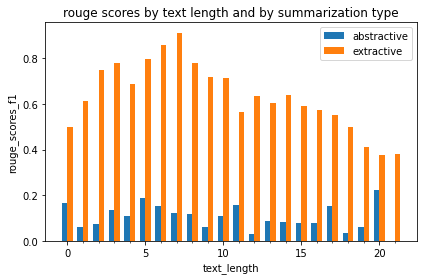

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

figure(figsize=(12, 10), dpi=80)
labels = list(afinal['text_len'])
abstrative_summary_score = list(afinal['rouge_scores_abs'])
extractive_summary_score = list(afinal['rouge_scores_ext'])
x = np.arange(len(list(afinal['text_len'])))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, abstrative_summary_score, width, label='abstractive')
rects2 = ax.bar(x + width/2, extractive_summary_score, width, label='extractive')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('rouge_scores_f1')
ax.set_xlabel('text_length')
ax.set_title('rouge scores by text length and by summarization type')
ax.set_xticks(x, labels)
ax.legend()

fig.tight_layout()

plt.show()
